In [4]:
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
# https://towardsdatascience.com/how-to-create-and-customize-venn-diagrams-in-python-263555527305
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles


from extract.jobs import parse_mallob, get_baseline

In [64]:
def getHasResult(df):
    # https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o/65442004#65442004

    conditions = [
        df["result"] == "SAT",
        df["result"] == "UNSAT",
        df["result"] == "UNKNOWN"
    ]

    outputs = [True, True, False]

    return np.select(conditions, outputs, default=False)

result = pd.Series(getHasResult(static_7_4_notrandom_df))

def twoIntersection(df1, df2):
    df1["solved"] = getHasResult(df1)
    df2["solved"] = getHasResult(df2)

    df1 = df1.set_index("identifier")["solved"]
    df2 = df2.set_index("identifier")["solved"]

    print(pd.concat([df1, df2], axis=1, join="outer"))


twoIntersection(static_7_4_random_df, static_7_4_notrandom_df)

            solved  solved
identifier                
1            False   False
2            False   False
3             True    True
4            False   False
5            False   False
...            ...     ...
396          False   False
397           True    True
398          False   False
399          False   False
400          False   False

[399 rows x 2 columns]


In [ ]:
static_7_4_random_df["result"]

In [65]:
random = static_7_4_random_df.set_index("identifier")["result"].rename("random")
notrandom = static_7_4_notrandom_df.set_index("identifier")["result"].rename("notrandom")

result = pd.concat([random, notrandom], axis=1, join="outer").fillna("UNKNOWN")

result.groupby(['random', 'notrandom']).size().reset_index().rename(columns={0:'count'})

,random,notrandom,count
0,SAT,SAT,75
1,SAT,UNKNOWN,19
2,UNKNOWN,SAT,6
3,UNKNOWN,UNKNOWN,238
4,UNKNOWN,UNSAT,1
5,UNSAT,UNKNOWN,9
6,UNSAT,UNSAT,51


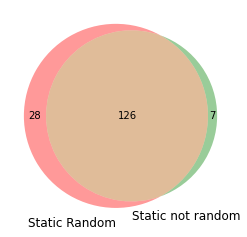

In [5]:
venn2(subsets = (19 + 9, 6 + 1, 75 + 51), set_labels = ('Static Random', 'Static not random'))

In [23]:
static_4_1_random_df = pd.DataFrame(parse_mallob("benchmark/static_4_1_random"))
static_7_4_random_df = pd.DataFrame(parse_mallob("benchmark/static_7_4_random"))
static_10_64_random_df = pd.DataFrame(parse_mallob("benchmark/static_10_64_random"))

static_7_4_notrandom_df = pd.DataFrame(parse_mallob("benchmark/static_7_4_notrandom"))

static_5_1_2_random_df = pd.DataFrame(parse_mallob("benchmark/static_5_1_2_random"))

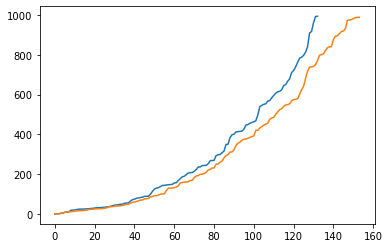

In [24]:
# Vergleiche nicht random mit random

# Wie viele gelöst
for df in [static_7_4_notrandom_df, static_7_4_random_df]:
    df[df["result"]!="UNKNOWN"].sort_values("duration").reset_index()["duration"].plot()

# Schnittmenge der gelösten (Löst es die gleichen Instanzen?)

In [ ]:
# Malleability testen